<a href="https://colab.research.google.com/github/HARIS2003JULY/Ai-AGent/blob/main/CLASS_%26_HOME_TASK_LAB11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#class task lab 11
#class task 1

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Load Dataset
data = pd.read_csv("/content/customer_segmentation_data (1) (1).csv")
print("Dataset Preview:")
print(data.head())
# Drop non-useful column
data = data.drop(columns=['Customer ID'])
# Encode Categorical Features
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
# Feature & Target Split
X = data.drop(columns=['Segmentation Group'])
y = data['Segmentation Group']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Prediction
y_pred = knn.predict(X_test)
 #Evaluation
accuracy = accuracy_score(y_test, y_pred)
loss = 1 - accuracy
print("\nModel Performance:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Loss     : {loss:.2f}")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Dataset Preview:
   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                           

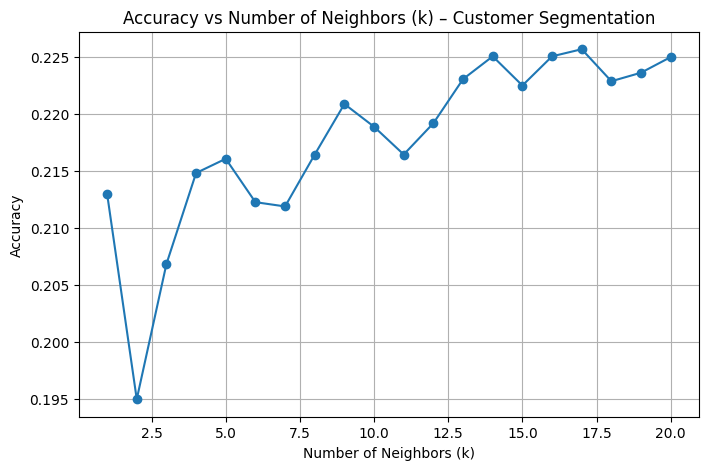

Optimal k: 17
Best Accuracy: 0.23


In [2]:
# Task 2: Optimal k Selection for KNN
# Customer Segmentation
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Try different values of k
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
# Plot Accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs Number of Neighbors (k) – Customer Segmentation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
# Find Optimal k
optimal_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"Optimal k: {optimal_k}")
print(f"Best Accuracy: {best_accuracy:.2f}")

 LAB 11
 HOME TASK

In [4]:
# ======================================
# Home Task - Question #1
# Comparing KNN with and without Standardization
# ======================================

# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ======================================
# Load Healthcare Dataset
# ======================================
# Change filename if needed
data = pd.read_csv("/content/healthcare_dataset.csv")

print("Dataset Preview:")
print(data.head())

# ======================================
# Encode Categorical Columns
# ======================================
label_encoders = {}

for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# ======================================
# Feature & Target Split
# (Assume target column is 'Readmitted')
# ======================================
X = data.drop(columns=['Readmitted'])
y = data['Readmitted']

# ======================================
# Train-Test Split
# ======================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ======================================
# 1️⃣ KNN WITHOUT Standardization
# ======================================
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = knn_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
loss_no_scaling = 1 - accuracy_no_scaling

# ======================================
# 2️⃣ KNN WITH Standardization
# ======================================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
loss_scaled = 1 - accuracy_scaled

# ======================================
# Results Comparison
# ======================================
print("\n--- Model Performance Comparison ---")
print("Without Standardization:")
print(f"Accuracy : {accuracy_no_scaling:.2f}")
print(f"Loss     : {loss_no_scaling:.2f}")

print("\nWith Standardization:")
print(f"Accuracy : {accuracy_scaled:.2f}")
print(f"Loss     : {loss_scaled:.2f}")


Dataset Preview:
   Age  Gender  BloodPressure  Cholesterol  PreviousAdmissions Readmitted
0   25    Male            120          180                   0         No
1   45  Female            140          210                   1        Yes
2   60    Male            150          240                   3        Yes
3   35  Female            130          200                   1         No
4   50    Male            145          230                   2        Yes

--- Model Performance Comparison ---
Without Standardization:
Accuracy : 1.00
Loss     : 0.00

With Standardization:
Accuracy : 1.00
Loss     : 0.00


Dataset Preview:
   Age  Gender  BloodPressure  Cholesterol  HeartRate  Severity
0   25    Male            120          180         72      Mild
1   40  Female            135          200         80  Moderate
2   55    Male            150          240         90    Severe
3   30  Female            125          190         75      Mild
4   65    Male            160          260         95    Severe

Best K Value: 3
Best Accuracy: 1.0


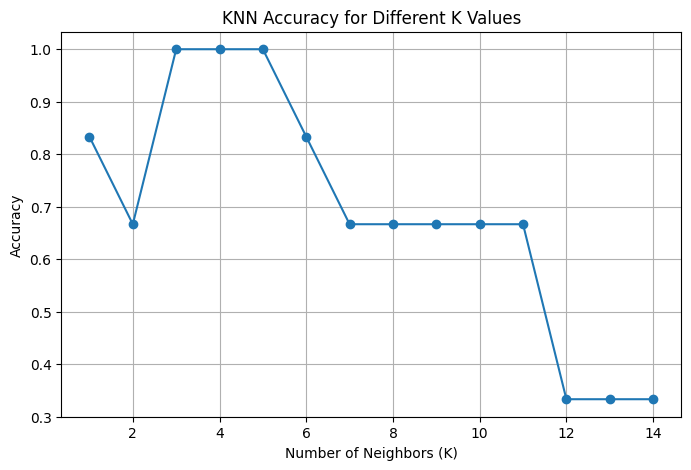

In [10]:
#HOME TASK 2
# ======================================
# HOME TASK 2 - FIXED VERSION
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Dataset
data = pd.read_csv("/content/disease_severity_dataset.csv")

print("Dataset Preview:")
print(data.head())

# Encode categorical columns
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Feature & Target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ FIX: K values limited to training samples
k_values = range(1, len(X_train) + 1)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Best K
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print("\nBest K Value:", best_k)
print("Best Accuracy:", round(best_accuracy, 2))

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.grid(True)
plt.show()

